#Exercise 2.4
An observer	has	completed	50 trials	in an	auditory,	a	visual and an	audio-visual spatial localisation	task.	The	data is	in files xA, xV	and	xAV. Fit the strong fusion model to	the	data.	Remember to	use	all	the	data to estimate the parameters.	

In [ ]:
#pip install lmfit

In [ ]:
#For Imports
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy import optimize
from sklearn.preprocessing import normalize
from lmfit import minimize, Parameters, report_fit

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

!ls drive/'My Drive'/'Cognitive modelling'
path_to_data = 'drive/My Drive/Cognitive modelling'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
exercise24.m  xAlapse.txt  xA.txt  xAVlapse.txt  xAV.txt  xVlapse.txt  xV.txt


In [ ]:
#Load the text files into numpy arrays
xA = np.loadtxt(path_to_data + '/xA.txt')
xAV = np.loadtxt(path_to_data + '/xAV.txt')
xV = np.loadtxt(path_to_data + '/xV.txt')
xAlapse = np.loadtxt(path_to_data + '/xAlapse.txt')
xAVlapse = np.loadtxt(path_to_data + '/xAVlapse.txt')
xVlapse = np.loadtxt(path_to_data + '/xVlapse.txt')

In [ ]:
def fun(params, xA, xV, xAV):
  muA = params[0]
  sigmaA = params[1]
  muV = params[2]
  sigmaV = params[3]
  sigma2A = params[1]**2
  sigma2V = params[3]**2

  wA = sigma2V / (sigma2A + sigma2V)

  muAV = wA*muA + (1-wA)*muV
  sigmaAV = math.sqrt(sigma2A*sigma2V/(sigma2A+sigma2V))
  negLL = -np.sum(np.log(norm.pdf(xA,muA,sigmaA))) - np.sum(np.log(norm.pdf(xV,muV,sigmaV))) - np.sum(np.log(norm.pdf(xAV,muAV,sigmaAV)))
  
  return negLL

In [ ]:
params0 = np.array([np.mean(xA), np.std(xA), np.mean(xV), np.std(xV)])

xopt = optimize.fmin(fun, x0=params0, args=(xA, xV, xAV))

Optimization terminated successfully.
         Current function value: 322.551365
         Iterations: 130
         Function evaluations: 216


In [ ]:
muAopt = xopt[0]
sigmaAopt = xopt[1]
muVopt = xopt[2]
sigmaVopt = xopt[3]

wAopt = sigmaVopt**2 / (sigmaAopt**2 + sigmaVopt**2)
muAVopt = wAopt*muAopt + (1-wAopt)*muVopt
sigmaAVopt = math.sqrt(sigmaAopt**2*sigmaVopt**2/(sigmaAopt**2+sigmaVopt**2))

print(f'muAopt: {muAopt}\n')
print(f'sigmaAopt: {sigmaAopt}\n')
print(f'muVopt: {muVopt}\n')
print(f'sigmaVopt: {sigmaVopt}\n')
print(f'muAVopt: {muAVopt}\n')
print(f'sigmaAVopt: {sigmaAVopt}\n')

muAopt: -15.665869656820263

sigmaAopt: 1.920617416364687

muVopt: 22.824805353884095

sigmaVopt: 2.9135259629664354

muAVopt: -4.006300304651422

sigmaAVopt: 1.60354954840962



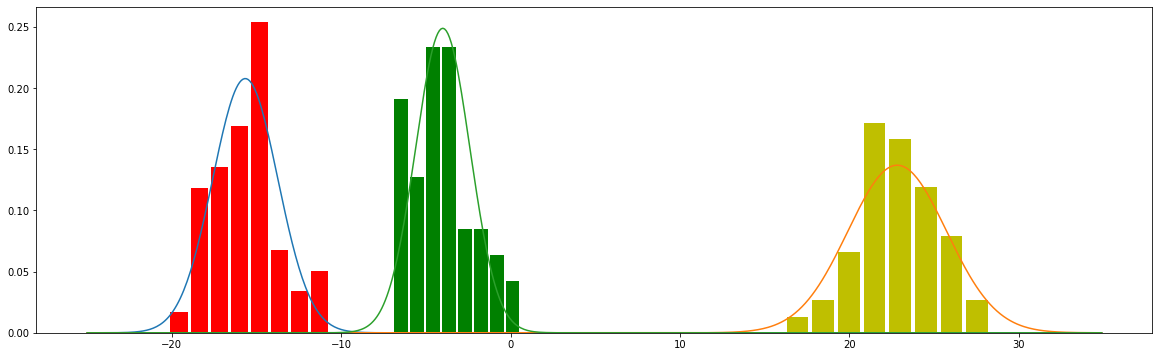

In [ ]:
xnew = np.arange(-25, 35, 0.1)
plt.figure(figsize=(20,6))

plt.hist(xA, bins= 8, density=True, color = 'r', rwidth = 0.85)
plt.plot(xnew, norm.pdf(xnew, muAopt, sigmaAopt))
plt.hist(xV,bins= 8, density=True, color = 'y', rwidth = 0.85)
plt.plot(xnew, norm.pdf(xnew, muVopt, sigmaVopt))
plt.hist(xAV,bins= 8, density=True, color = 'g', rwidth = 0.85)
plt.plot(xnew, norm.pdf(xnew, muAVopt, sigmaAVopt))



In [ ]:
params0lapse = np.array([np.mean(xAlapse), np.std(xAlapse), np.mean(xVlapse), np.std(xVlapse)])
print(params0lapse)

xoptlapse = optimize.fmin(fun, x0=params0lapse, args=(xAlapse, xVlapse, xAVlapse))

[-15.83255046   4.64427346  22.460033     3.66250078]
Optimization terminated successfully.
         Current function value: 423.422285
         Iterations: 129
         Function evaluations: 225


In [ ]:
muAoptlapse = xoptlapse[0]
sigmaAoptlapse = xoptlapse[1]
muVoptlapse = xoptlapse[2]
sigmaVoptlapse = xoptlapse[3]

wAoptlapse = sigmaVoptlapse**2 / (sigmaAoptlapse**2 + sigmaVoptlapse**2)
muAVoptlapse = wAoptlapse*muAoptlapse + (1-wAoptlapse)*muVoptlapse
sigmaAVoptlapse = math.sqrt(sigmaAoptlapse**2*sigmaVoptlapse**2/(sigmaAoptlapse**2+sigmaVoptlapse**2))

print(f'muAoptlapse: {muAoptlapse}\n')
print(f'sigmaAoptlapse: {sigmaAoptlapse}\n')
print(f'muVoptlapse: {muVoptlapse}\n')
print(f'sigmaVoptlapse: {sigmaVoptlapse}\n')
print(f'muAVoptlapse: {muAVoptlapse}\n')
print(f'sigmaAVoptlapse: {sigmaAVoptlapse}\n')

muAopt: -16.132626655488753

sigmaAopt: 3.8889377028637906

muVopt: 22.159900670858562

sigmaVopt: 5.472643642868698

muAVopt: -3.2841058595310972

sigmaAVopt: 3.1700544357019425



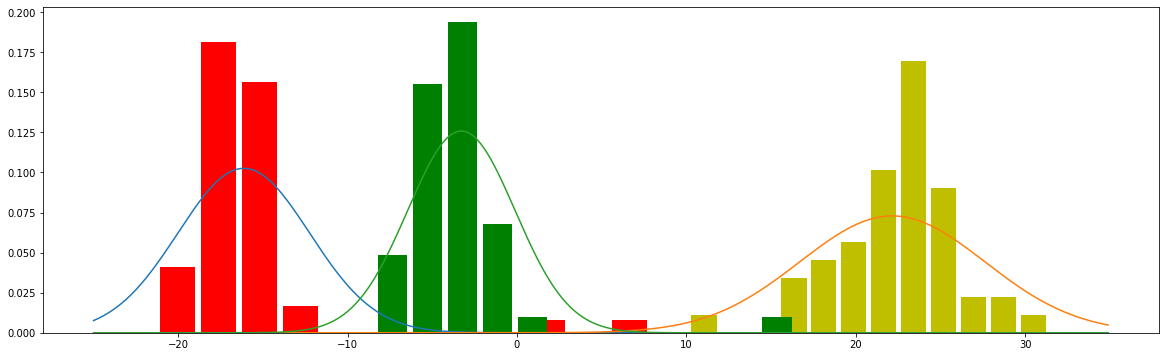

In [ ]:
plt.figure(figsize=(20,6))

plt.hist(xAlapse, bins= 12, density=True, color = 'r', rwidth = 0.85)
plt.plot(xnew, norm.pdf(xnew, muAoptlapse, sigmaAoptlapse))
plt.hist(xVlapse,bins= 12, density=True, color = 'y', rwidth = 0.85)
plt.plot(xnew, norm.pdf(xnew, muVoptlapse, sigmaVoptlapse))
plt.hist(xAVlapse,bins= 12, density=True, color = 'g', rwidth = 0.85)
plt.plot(xnew, norm.pdf(xnew, muAVoptlapse, sigmaAVoptlapse))